[View in Colaboratory](https://colab.research.google.com/github/kintarou/django-starter/blob/master/fftpack.ipynb)

/usr/local/lib/python3.6/dist-packages/numpy/core/numeric.py:492: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


Text(0,0.5,'Amplitude')

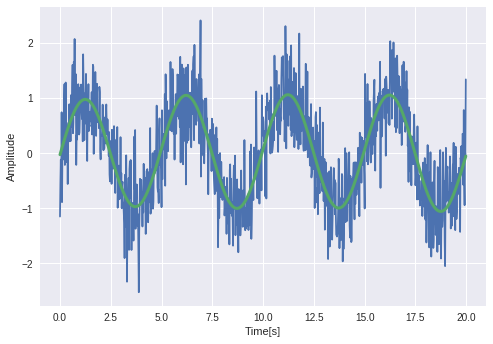

In [4]:
import numpy as np
from scipy import fftpack
time_step = 0.02
period = 5.
time_vec = np.arange(0, 20, time_step)
sig = np.sin(2*np.pi / period*time_vec)+ \
   0.5*np.random.randn(time_vec.size)
sample_freq = fftpack.fftfreq(sig.size, d=time_step)
sig_fft = fftpack.fft(sig)
pidxs = np.where(sample_freq>0)
freqs = sample_freq[pidxs]
power = np.abs(sig_fft)[pidxs]
freq = freqs[power.argmax()]
np.allclose(freq, 1./period)
sig_fft[np.abs(sample_freq)>freq]=0
main_sig=fftpack.ifft(sig_fft)
import pylab as plt
plt.figure()
plt.plot(time_vec,sig)
plt.plot(time_vec, main_sig, linewidth=3)
plt.xlabel('Time[s]')
plt.ylabel('Amplitude')